# CS 229 - PS 1: Problem 1


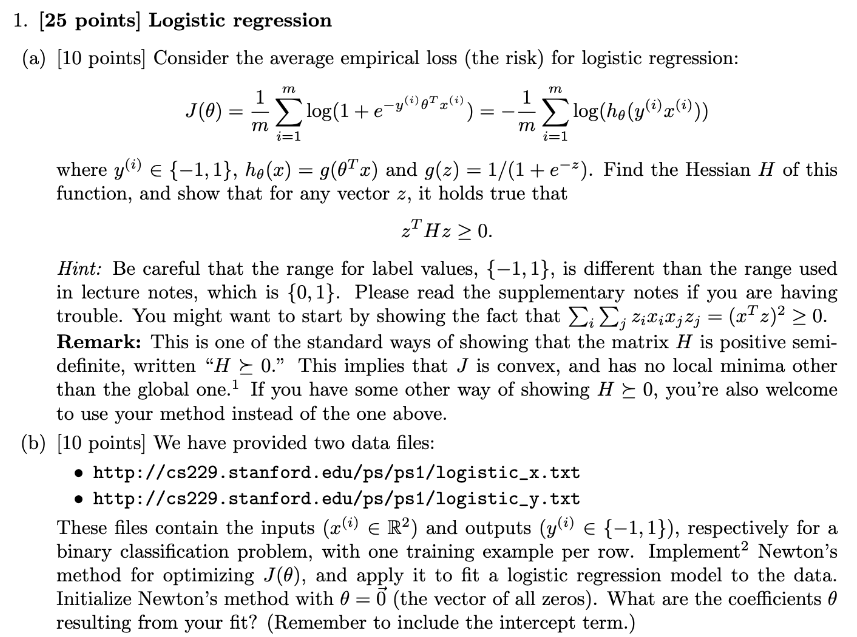

In [9]:
#imports
import pandas as pd
import numpy as np
import math 


### The solution to part a was $H_{ij} = \frac{1}{m} \sum_{k=1}^{m} (y^{(k)})^2 x_{i}^{(k)} x_{j}^{(k)} g(y^{(k)} \theta^{T} x^{(k)}) (1 - g(y^{(k)} \theta^{T} x^{(k)}))$ 

### where $g(z)=\frac{1}{1 + e^{-z}}$
<br>

---

### Newton Method update rule

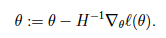



### Steps
1. Calculate $H$ for current value of $\theta$
2. Use this to find $H^{-1}$ 
3. Calculate $\delta$ 
4. Update $\theta$ by the update rule described previously


In [24]:
#main
theta = np.zeros((3))
loss = [J(X_data,Y,theta,n)]
for i in range(10):
    theta,H,delta,cur_loss = update(theta,H,delta,X_data,Y,n)
    loss.append(cur_loss) 
    
print(theta)
print(loss)

[-2.6205116   0.76037154  1.17194674]
[-0.6931471805599458, -0.3747247075760391, -0.33425013576955137, -0.32928119947970075, -0.32914756442755344, -0.32914743129585516, -0.329147431295712, -0.32914743129571195, -0.329147431295712, -0.329147431295712, -0.329147431295712]


### Results
The **parameters** we found are as follows:
- $\theta_0 = -2.62$
- $\theta_1 = 0.76$
- $\theta_2 = 1.17$
---

*Read on for how we got these results and the helper functions.*
<br>

--- 

### Loading the Data

In [11]:
x = pd.read_csv('logistic_x.txt', sep="  ", header = None)
x

/Users/anjayfriedman1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315
...,...,...
94,4.774854,0.099415
95,5.827485,-0.690058
96,2.289474,1.970760
97,2.494152,1.415205


In [12]:
y = pd.read_csv('logistic_y.txt', header = None)
y

,0
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
94,1.0
95,1.0
96,1.0
97,1.0


In [13]:
X = x.to_numpy()
Y = y.to_numpy()

#### We now have our x and y data. Since we are doing logistic regression, we must add a column of 1's to our X data since one of our $\theta$'s will be an intercept. We also must initialize our $\theta$, H and $\delta$

In [14]:
n = 99 
i = np.ones((n,1))
X_data = np.concatenate((i,X),1)

H = np.zeros((3,3))
theta = np.zeros((3)) #dimension of x + 1
delta =  np.zeros((3))

In [15]:
def sigmoid(z):
    return 1/(1 + math.exp(-z))

In [16]:
def h(yi,xi,thet):
    if(yi.shape[0]==99): 
        print("y")
    if(xi.shape[0]==99): 
        print("x")
    a = yi*xi
    return sigmoid(np.dot(thet,a))

In [17]:
#loss function as defined in question
def J(x,y,thet,n):
    loss = 0
    for rows in range(x.shape[0]):
        loss+= math.log(h(y[rows],x[rows],thet))
    return loss/n

In [18]:
#returns ijth index of H 
def H_ij(i,j,x,y,thet,n):
    cur = 0
    for rows in range(x.shape[0]):
        yr = y[rows]
        xr = x[rows]
        ht = h(yr,xr,thet)
        
        cur += (yr**2)*xr[i]*xr[j]*ht*(1-ht)
    
    return cur/n  

In [19]:
#return the partial derivative of J wrt thet[i]
def del_i(i,x,y,thet,n):
    cur = 0
    for rows in range(x.shape[0]):
        yr = y[rows]
        xr = x[rows]
        ht = h(yr,xr,thet)
        
        cur += (1-ht)*xr[i]*yr
    
    return -1*cur/n  

In [20]:
#Calculates the Hessian
def calc_H(x,y,thet,n):
    h = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            h[i][j] = H_ij(i,j,x,y,thet,n)
            
    return h

In [21]:
#Calculates delta
def calc_delta(x,y,thet,n):
    d = np.zeros((3))
    for i in range(3):
        d[i] = del_i(i,x,y,thet,n)
            
    return d

In [22]:
#Update theta
def update_theta(theta,H,delta):
    H_inv = np.linalg.inv(H) #FIXME
    theta = theta - np.matmul(H_inv,delta) #FIXME
    return theta

In [23]:
#update function 
def update(theta,H,delta,x,y,n):
    H = calc_H(x,y,theta,n)
    delta = calc_delta(x,y,theta,n)
    theta = update_theta(theta,H,delta)
    loss = J(x,y,theta,n)
    
    return theta,H,delta,loss 

## Part (c)

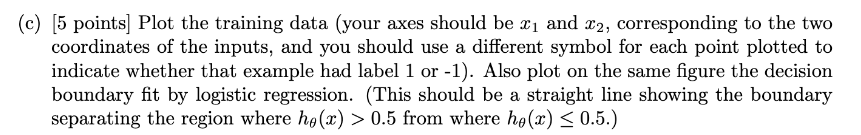

In [3]:
#imports for (c)
import matplotlib.pyplot as plt

The **parameters** we found previously are as follows:
- $\theta_0 = -2.62$
- $\theta_1 = 0.76$
- $\theta_2 = 1.17$

The **decision boundary** $h_\theta(x) = 0.5$ will be the line given by solving  $(\theta_0,\theta_1,\theta_2)^T (1,x_1,x_2) = 0.5 $

The **solution** with $x_2$ as a function of $x_1$ is:
> $x_2 = \frac{0.5 - x_1 \theta_1 - \theta_0}{\theta_2} = ax + b$ where $a=\frac{-\theta_1}{\theta_2}$ and $b=\frac{0.5-\theta_0}{\theta_2}$ 

In [40]:
#label colors for each point
colors = []
for c in range(99):
    colors.append('green') if Y[c]==1 else colors.append('yellow')

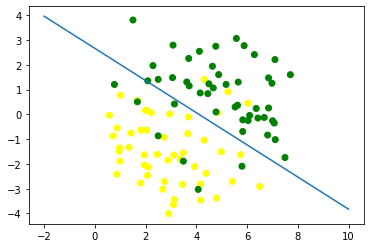

In [41]:
#plot boundary 
xvals = np.arange(-2,10,0.001)
yvals = xvals*(-0.76/1.17) + ((0.5+2.62)/1.17) #linear equation with parameters found
plt.scatter(x[0],x[1],c=colors)
plt.plot(xvals, yvals)
plt.show()


The above graph has the dots with a +1 classification as green and those with -1 as yellow. It demonstrates that the decision boundary generated by applying Newton's method to the cost function $J(\theta)$ with logistic regression is generally correct. 

**Thanks for reading :)**